# K means on Optdigits dataset
Task - Apply PCA on Optdigits dataset. Choose features that explain 90% of the variance. Build a classifier using K-means, and calculate accuracy.

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import random as rd

In [2]:
optdigits_df=pd.read_csv('optdigits_csv.csv')
optdigits_df

,input1,input2,input3,input4,input5,input6,input7,input8,input9,input10,...,input56,input57,input58,input59,input60,input61,input62,input63,input64,class
0,0,1,6,15,12,1,0,0,0,7,...,0,0,0,6,14,7,1,0,0,0
1,0,0,10,16,6,0,0,0,0,7,...,0,0,0,10,16,15,3,0,0,0
2,0,0,8,15,16,13,0,0,0,1,...,0,0,0,9,14,0,0,0,0,7
3,0,0,0,3,11,16,0,0,0,0,...,0,0,0,0,1,15,2,0,0,4
4,0,0,5,14,4,0,0,0,0,0,...,0,0,0,4,12,14,7,0,0,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5615,0,0,4,10,13,6,0,0,0,1,...,0,0,0,2,14,15,9,0,0,9
5616,0,0,6,16,13,11,1,0,0,0,...,0,0,0,6,16,14,6,0,0,0
5617,0,0,1,11,15,1,0,0,0,0,...,0,0,0,2,9,13,6,0,0,8
5618,0,0,2,10,7,0,0,0,0,0,...,0,0,0,5,12,16,12,0,0,9


In [4]:
optdigits_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5620 entries, 0 to 5619
Data columns (total 65 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   input1   5620 non-null   int64
 1   input2   5620 non-null   int64
 2   input3   5620 non-null   int64
 3   input4   5620 non-null   int64
 4   input5   5620 non-null   int64
 5   input6   5620 non-null   int64
 6   input7   5620 non-null   int64
 7   input8   5620 non-null   int64
 8   input9   5620 non-null   int64
 9   input10  5620 non-null   int64
 10  input11  5620 non-null   int64
 11  input12  5620 non-null   int64
 12  input13  5620 non-null   int64
 13  input14  5620 non-null   int64
 14  input15  5620 non-null   int64
 15  input16  5620 non-null   int64
 16  input17  5620 non-null   int64
 17  input18  5620 non-null   int64
 18  input19  5620 non-null   int64
 19  input20  5620 non-null   int64
 20  input21  5620 non-null   int64
 21  input22  5620 non-null   int64
 22  input23  5620 non-null  

In [5]:
optdigits_df.describe()

,input1,input2,input3,input4,input5,input6,input7,input8,input9,input10,...,input56,input57,input58,input59,input60,input61,input62,input63,input64,class
count,5620.0,5620.000000,5620.000000,5620.000000,5620.000000,5620.000000,5620.000000,5620.000000,5620.000000,5620.000000,...,5620.000000,5620.000000,5620.000000,5620.000000,5620.000000,5620.000000,5620.000000,5620.000000,5620.000000,5620.000000
mean,0.0,0.302135,5.393238,11.815480,11.578292,5.593772,1.379359,0.138256,0.003203,1.971174,...,0.166904,0.000356,0.281851,5.760498,11.989680,11.572420,6.720819,2.093594,0.254093,4.495196
std,0.0,0.879962,4.672719,4.255952,4.462546,5.631149,3.356633,1.046998,0.090423,3.098815,...,0.843455,0.018863,0.929969,5.021145,4.347542,4.975675,5.815564,4.047959,1.418558,2.868131
min,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,0.000000,1.000000,10.000000,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,10.000000,9.000000,0.000000,0.000000,0.000000,2.000000
50%,0.0,0.000000,5.000000,13.000000,13.000000,4.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,5.000000,13.000000,13.000000,6.000000,0.000000,0.000000,4.000000
75%,0.0,0.000000,9.000000,15.000000,15.000000,10.000000,0.000000,0.000000,0.000000,3.000000,...,0.000000,0.000000,0.000000,10.000000,15.000000,16.000000,12.000000,2.000000,0.000000,7.000000
max,0.0,8.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,5.000000,16.000000,...,13.000000,1.000000,10.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,9.000000


In [6]:
data_features=optdigits_df.iloc[:,:64]
data_features

,input1,input2,input3,input4,input5,input6,input7,input8,input9,input10,...,input55,input56,input57,input58,input59,input60,input61,input62,input63,input64
0,0,1,6,15,12,1,0,0,0,7,...,0,0,0,0,6,14,7,1,0,0
1,0,0,10,16,6,0,0,0,0,7,...,3,0,0,0,10,16,15,3,0,0
2,0,0,8,15,16,13,0,0,0,1,...,0,0,0,0,9,14,0,0,0,0
3,0,0,0,3,11,16,0,0,0,0,...,0,0,0,0,0,1,15,2,0,0
4,0,0,5,14,4,0,0,0,0,0,...,12,0,0,0,4,12,14,7,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5615,0,0,4,10,13,6,0,0,0,1,...,4,0,0,0,2,14,15,9,0,0
5616,0,0,6,16,13,11,1,0,0,0,...,1,0,0,0,6,16,14,6,0,0
5617,0,0,1,11,15,1,0,0,0,0,...,0,0,0,0,2,9,13,6,0,0
5618,0,0,2,10,7,0,0,0,0,0,...,2,0,0,0,5,12,16,12,0,0


In [7]:
data_labels=optdigits_df.iloc[:,64:]
data_labels

,class
0,0
1,0
2,7
3,4
4,6
...,...
5615,9
5616,0
5617,8
5618,9


# Applying PCA
Applying PCA to the entire dataset to reduce size from 64 to features that explain 90% of variance

In [8]:
def normalising_function(X):
    X_standard=StandardScaler().fit_transform(X)
    X_mean=np.mean(X_standard,axis=0)
    X_cov=(X_standard - X_mean).T.dot((X_standard - X_mean))/(X_standard.shape[0]-1)
    return X_standard,X_mean,X_cov

In [9]:
def Principal_Component_Analysis(X):
    X_standard,X_mean,X_cov=normalising_function(X)
    
    X_standard=X_standard-X_standard.mean(axis=0)
    
    fig=plt.figure(figsize=(10,10))
    sns.heatmap(pd.DataFrame(X_cov))
    plt.show()
    
    eigenvalues, eigenvectors = np.linalg.eig(X_cov)
    
    unsorted_eigen_value_vector_pair=[(np.abs(eigenvalues[i]),eigenvectors[:,i]) for i in range(len(eigenvalues))]
    sorted_eigen_value_vector_pair=sorted(unsorted_eigen_value_vector_pair, reverse=True, key=lambda x:x[0])

    fig=plt.figure(figsize=(15,4))
    sns.heatmap(pd.DataFrame([pair[1] for pair in sorted_eigen_value_vector_pair[0:21]]),annot=False,cmap='coolwarm',vmin=-0.5,vmax=0.5)
    plt.ylabel("Ranked Eigen Values")
    plt.xlabel("Eigen Vector Components")
    plt.show()
    
    lam_sum=sum(eigenvalues)
    explained_variance=[(lam_k/lam_sum) for lam_k in sorted(eigenvalues,reverse=True)]
    
    plt.figure(figsize=(6,4))
    plt.bar(range(len(explained_variance)),explained_variance,alpha=0.5,align='center',label='Individual Explained variance $\lambda_{k}$')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Ranked Principal Components')
    plt.title('Scree Graph')
    plt.legend(loc='best')
    plt.tight_layout()
    
    
    fig = plt.figure(figsize=(6,4))
    ax1 = fig.add_subplot(111)
    ax1.plot(np.cumsum(explained_variance))
    ax1.set_ylim([0,1.0])
    ax1.set_xlabel('Number of Principal Components')
    ax1.set_ylabel('Cumulative explained variance')
    ax1.set_title('Explained Variance')
    plt.show()


    print("Choosing 5 Principal Components explains : ",np.cumsum(explained_variance)[5], "% of variance")
    print("Choosing 25 Principal Components explains : ",np.cumsum(explained_variance)[25], "% of variance")
    print("Choosing 32 Principal Components explains : ",np.cumsum(explained_variance)[32], "% of variance")

    print([(j, np.cumsum(explained_variance)[j]) for j in range(len(explained_variance[:64]))])

    matW = np.hstack( pair[1].reshape(64,1) for pair in sorted_eigen_value_vector_pair[0:32])#[0:4] originally
    print(matW.shape)

    Z = X_standard.dot(matW)
    #Z = matW.T.dot(X_standard.T)
    print(Z.shape)
    
    return Z

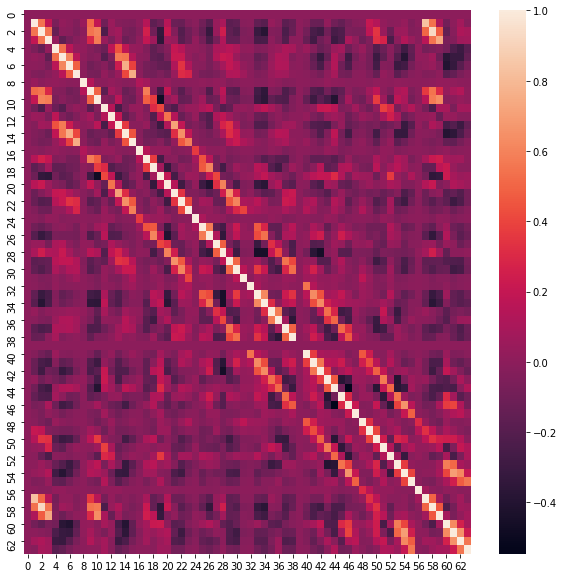

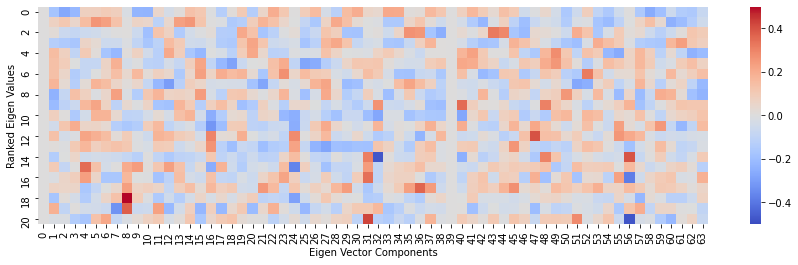

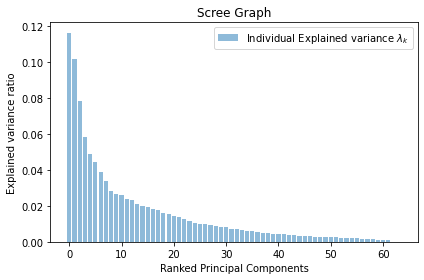

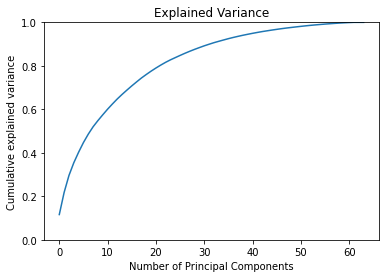

Choosing 5 Principal Components explains :  0.44732825852903496 % of variance
Choosing 25 Principal Components explains :  0.8479138853061887 % of variance
Choosing 32 Principal Components explains :  0.9065040948562836 % of variance
[(0, 0.1160585797154409), (1, 0.2177601161233071), (2, 0.29578207686805946), (3, 0.35416783000474455), (4, 0.4028966124322764), (5, 0.44732825852903496), (6, 0.4859160266769499), (7, 0.5198848369593643), (8, 0.5483551098075372), (9, 0.574995876122954), (10, 0.600791131611671), (11, 0.6247551798844069), (12, 0.6477193692540997), (13, 0.668685735427811), (14, 0.6885398127457846), (15, 0.7077989429543592), (16, 0.7261948184902292), (17, 0.7441058853585977), (18, 0.7602160774689605), (19, 0.7755830961228702), (20, 0.7899864215896472), (21, 0.8034997499836579), (22, 0.8161341726764699), (23, 0.8275074818130193), (24, 0.8377775153578138), (25, 0.8479138853061887), (26, 0.8577568820173247), (27, 0.8669996538302908), (28, 0.875787099796972), (29, 0.884024846987981

<ipython-input-9-da382ebc58e6>:49: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  matW = np.hstack( pair[1].reshape(64,1) for pair in sorted_eigen_value_vector_pair[0:32])#[0:4] originally


In [11]:
reduced_data_features=Principal_Component_Analysis(data_features)

In [44]:
reduced_data_features.shape

(5620, 32)

In [45]:
pd.DataFrame(reduced_data_features)

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,0.296633,-1.446450,-3.863044,-3.223597,0.773631,-0.631849,0.163733,-0.474708,-1.085103,-0.027994,...,-0.503188,1.278939,0.410564,0.228387,-0.265315,1.247358,0.102167,0.056790,0.557610,-0.158295
1,0.156717,-3.065688,-5.811656,-3.232099,1.064670,-0.031353,0.270302,-2.091832,-1.487364,-0.998295,...,-0.081156,-0.187086,-1.761830,-0.706010,-0.068266,0.738773,0.449957,-0.378218,0.696727,0.145415
2,0.753929,3.261949,0.779656,-1.108976,0.311024,0.814548,-4.307315,-0.841364,-1.166513,-0.126725,...,-0.114175,0.453171,0.436972,0.552794,-0.099236,0.082379,-0.135083,0.345285,-0.150928,-1.034220
3,4.226579,1.900320,-0.441486,1.329548,-0.149220,-2.710149,2.128209,-0.206327,-1.659819,0.573584,...,0.578488,-0.929916,0.047457,-0.206006,0.232129,-0.976967,-0.283442,0.460101,-0.291758,-0.676466
4,-0.582983,-3.490539,-1.602212,-1.052587,-1.360737,-0.406474,-0.662578,2.572619,0.341349,0.066232,...,-0.636600,-0.057333,0.397723,-0.128116,0.119276,0.316139,0.733094,0.460611,1.103842,-0.249783
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5615,0.260749,0.532480,-3.570143,2.445394,-0.113723,-0.928772,0.327163,-0.787101,1.013526,-0.245625,...,0.430907,0.368473,0.388450,0.284369,0.074333,0.167293,-0.452347,0.367797,-0.281804,0.259847
5616,2.076395,-1.863463,-3.302175,-2.413700,0.693364,-0.278660,-0.349877,-2.381294,0.677844,-0.100049,...,-0.240728,0.335265,-0.027086,0.136556,-0.285468,-0.093997,1.115148,-0.584714,0.124890,-0.183678
5617,0.793740,-0.622341,2.540968,0.418528,0.729445,-1.279900,-0.172011,-0.796436,2.533987,-0.239661,...,-0.086973,0.623176,0.469067,0.362384,-0.279546,0.265211,0.325973,0.079452,0.309240,0.940392
5618,0.938669,-0.376866,-2.333093,1.630636,-0.388455,-1.474206,0.667732,-0.605326,0.555837,-0.587358,...,-0.202040,0.784814,-0.199555,-1.156187,0.866912,-0.854041,-0.985461,0.256778,-1.117577,0.780696


## To perform kmeans algorithm one has to follow these steps:
1. Decide the number of cluster in our case there are 10 digits to be classified so 10 clusters.
2. Initialize the centroid
3. Assign to each point in the dataset a centroid, respective centroid are assigned to each point by calculating the shortest distance between centroid and point.
4. Calculate the new centroid by calculating mean of all points assigned to the centroid.
5. Repeat the algorithm till value in centroid doesnt change

In [18]:
def test_train_splitter(reduced_data_features):
    X,Y = train_test_split(reduced_data_features,test_size=0.20, random_state=1)
    division = X.shape[1] - 1
    print(division)
    X_without_label = X.iloc[:,0:division].values 
    X_with_label = X.iloc[:,:].values
    Y_data = Y.iloc[:,0:division].values  
    Y_label = Y.iloc[:,division].values 
    return X_with_label,X_without_label,Y_data,Y_label

## Step 2 Centroid initialization
In this step centroids are initialized.    
It is ensured that centroids are initialized from each digit. 

In [36]:
def centroid_initialization(X_with_label,X_without_label):    
    i = 0
    Centroids=np.array([]).reshape(no_of_features,0)
    while(i<10):
        rand=rd.randint(0,m-1)
        # A point is guessed and label is correlated with i whose value varies from 0 - 10
        # If value of label is mached with i it is added in centroids
        # i is incremented
        if(X_with_label[rand,no_of_features] == i):
            Centroids=np.c_[Centroids,X_without_label[rand]]
            i = i + 1
    return Centroids

## K-Means Algorithm
From centroid EuclidianDistance is calculated with each Point and a cluster is assigned to a point based on the shortest distance with the cluster.  
Mean is calculated from each point in a respective centroid and is used as a new centroid.   

In [37]:
def kmeans_algorithm(X_with_label,X_without_label,Centroids):
    num_iter=100
    Output={} #output that will store each point in a cluster
    for n in range(100):
        EuclidianDistance=np.array([]).reshape(m,0)
        for k in range(K):
            tempDist=np.sum((X_without_label-Centroids[:,k])**2,axis=1)
            EuclidianDistance=np.c_[EuclidianDistance,tempDist]
        C=np.argmin(EuclidianDistance,axis=1) # cluster for each point based on shortest distance from a centroid 
        #Calculating new mean
        Z={}
        for k in range(K):
            Z[k]=np.array([]).reshape(no_of_features,0)
            Output[k]=np.array([]).reshape(no_of_features+1,0)
        for i in range(m):
            Z[C[i]]=np.c_[Z[C[i]],X_without_label[i]]
            Output[C[i]]=np.c_[Output[C[i]],X_with_label[i]]     
        for k in range(K):
            Z[k]=Z[k].T
        for k in range(K):
            Centroids[:,k]=np.mean(Z[k],axis=0)
        return Output

### Showing all digits present in a cluster based on their labels

In [38]:
def print_number_in_all_cluster(Output):
    for i  in range(0,10):
        print("cluster "+str(i))
        print("Number of elements in a cluster: " + str(Output[i].shape[1]))
        print(Output[i][no_of_features,:])

### visualizing points based on their features

In [39]:
def visualize_50_digits_in_cluster(Output):
    for j in range(0,10):
        plt.figure(figsize=(30,10))
        print('Cluster ' + str(j))
        numOfRows = 50
        print(str(Output[j].shape[1]) + " elements")
        for i in range(0,50):
            plt.subplot(5+1,10,i+1)
            image = Output[j][0:no_of_features,i]
            image = image.reshape(8,8)
            plt.imshow(image,cmap='gray')
            plt.axis('off')
        plt.show()

## Measuring Accuracy
The accuracy is Measured by calculating which cluster the data belongs and assigning the value of the respective cluster.  
Comparing how many are correctly identified and dividing with number of test data.

In [40]:
def measuring_accuracy(Centroids,Y_data,Y_label):
    number_of_test_data = Y_data.shape[0]
    EuclidianDistance=np.array([]).reshape(number_of_test_data,0)
    for k in range(K):
        tempDist=np.sum((Y_data-Centroids[:,k])**2,axis=1)
        EuclidianDistance=np.c_[EuclidianDistance,tempDist]
    predicted_value=np.argmin(EuclidianDistance,axis=1)
    number_of_correct_prediction = 0
    for i in range(0,predicted_value.shape[0]):
        if(predicted_value[i] == Y_label[i]):
            number_of_correct_prediction = number_of_correct_prediction + 1
    accuracy = number_of_correct_prediction/number_of_test_data * 100
    print('Accurcy in test Dataset:')
    print(accuracy)

In [47]:
X_with_label,X_without_label,Y_data,Y_label = test_train_splitter(optdigits_df)
m = X_without_label.shape[0]
no_of_features = X_without_label.shape[1]
print('No ' , no_of_features)
K=10
Centroids = centroid_initialization(X_with_label,X_without_label)
Output = kmeans_algorithm(X_with_label,X_without_label,Centroids)

64
No  64


Cluster 0
485 elements


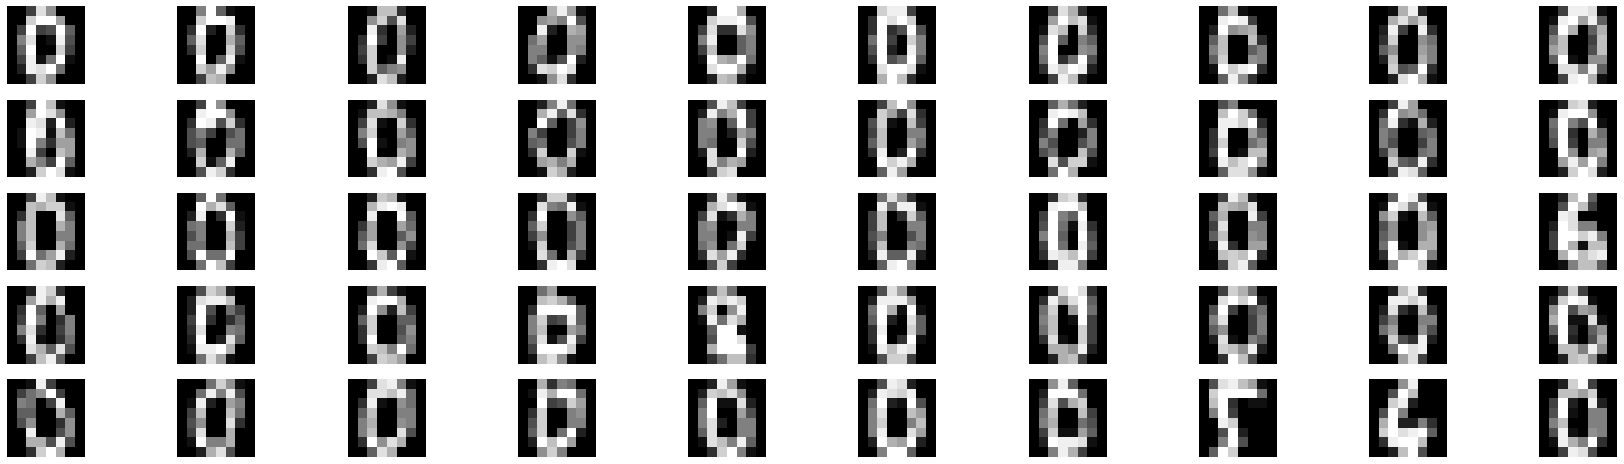

Cluster 1
432 elements


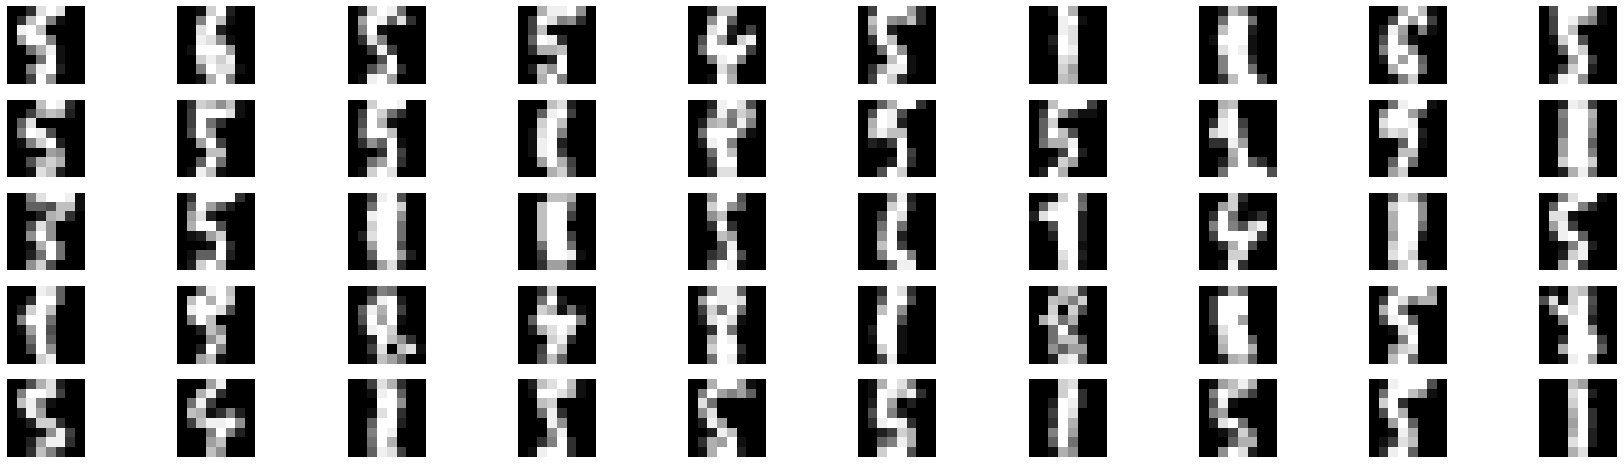

Cluster 2
500 elements


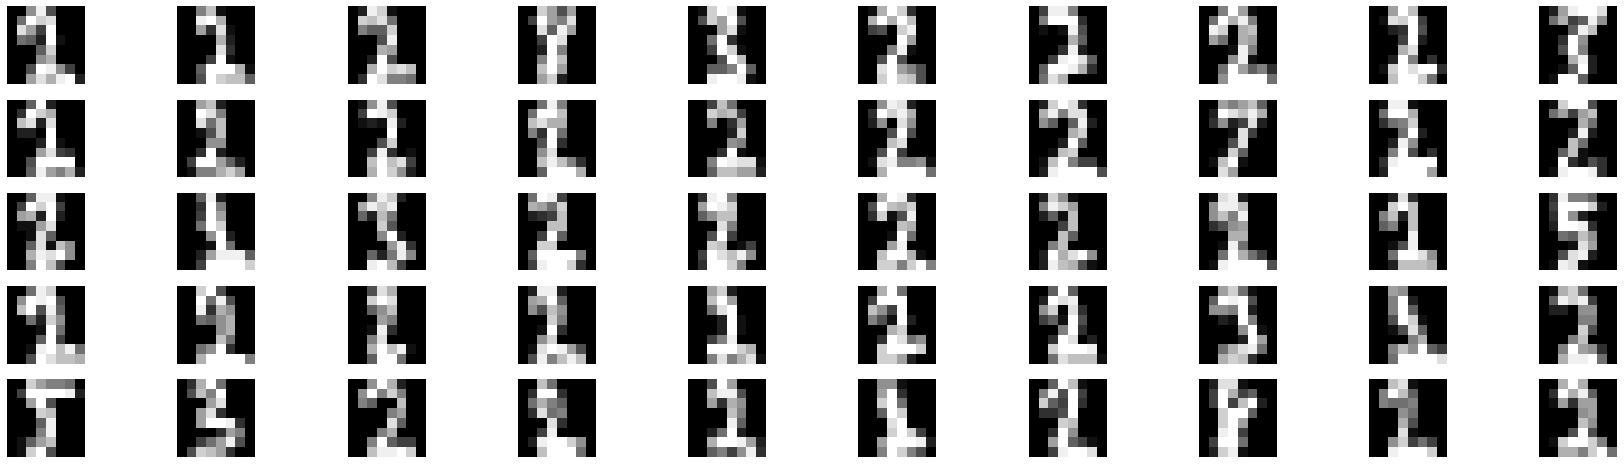

Cluster 3
608 elements


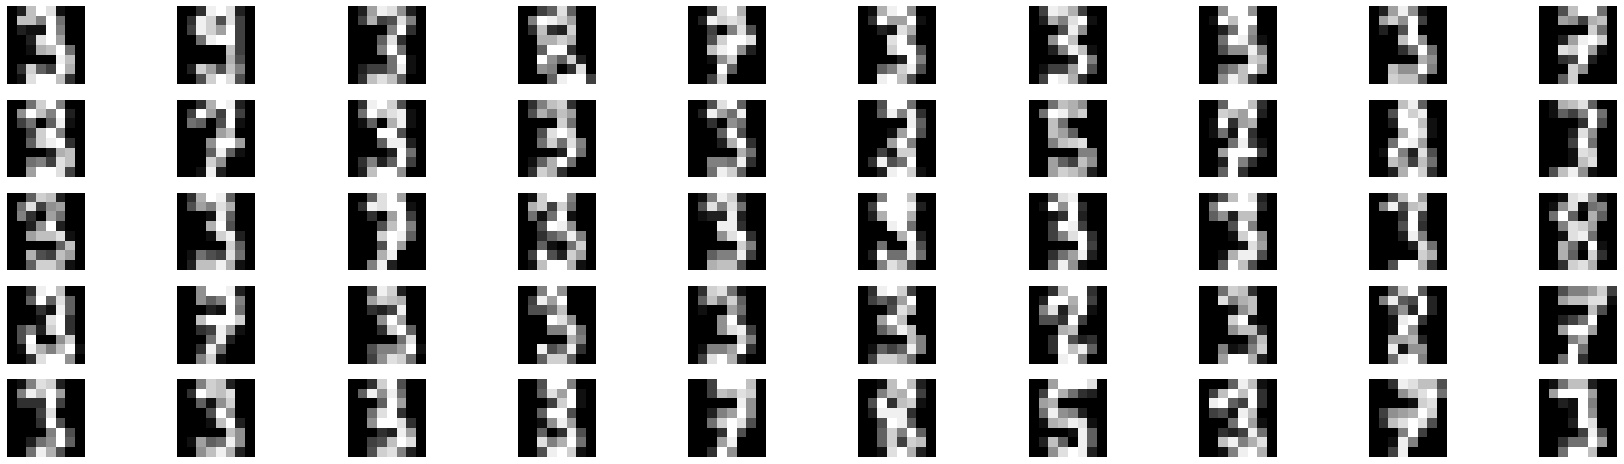

Cluster 4
662 elements


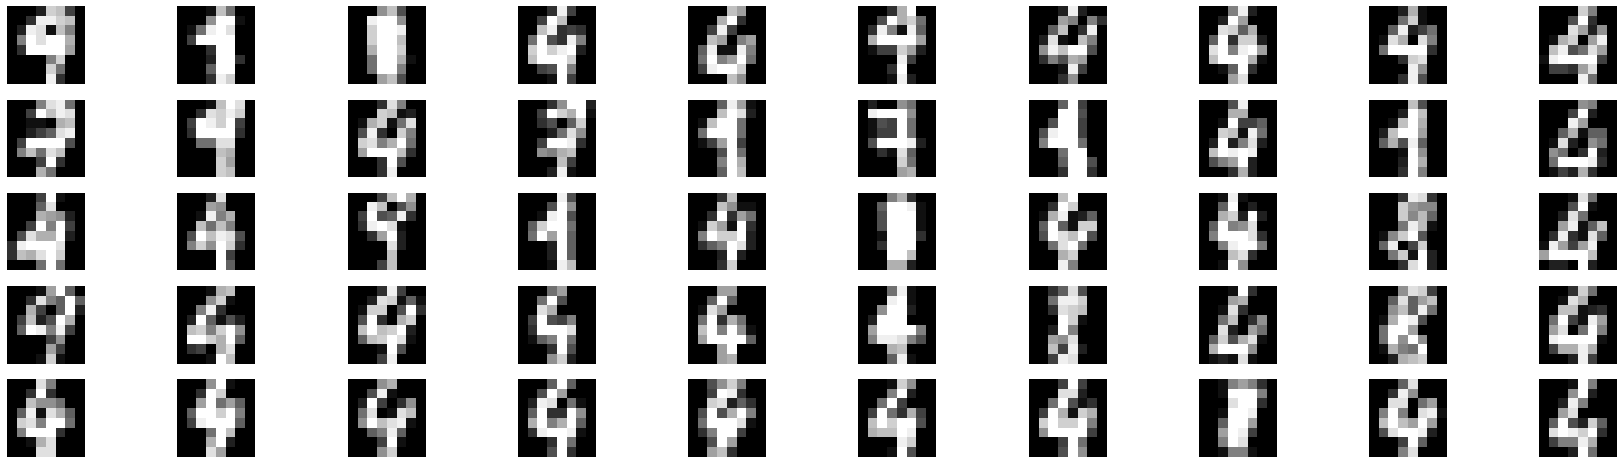

Cluster 5
263 elements


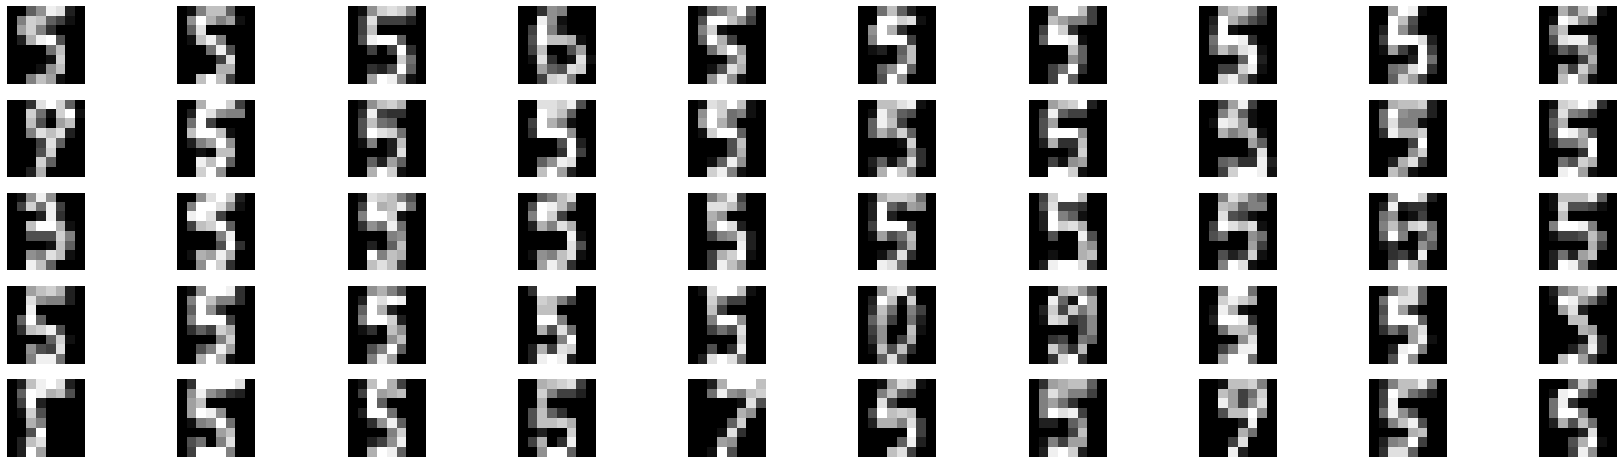

Cluster 6
410 elements


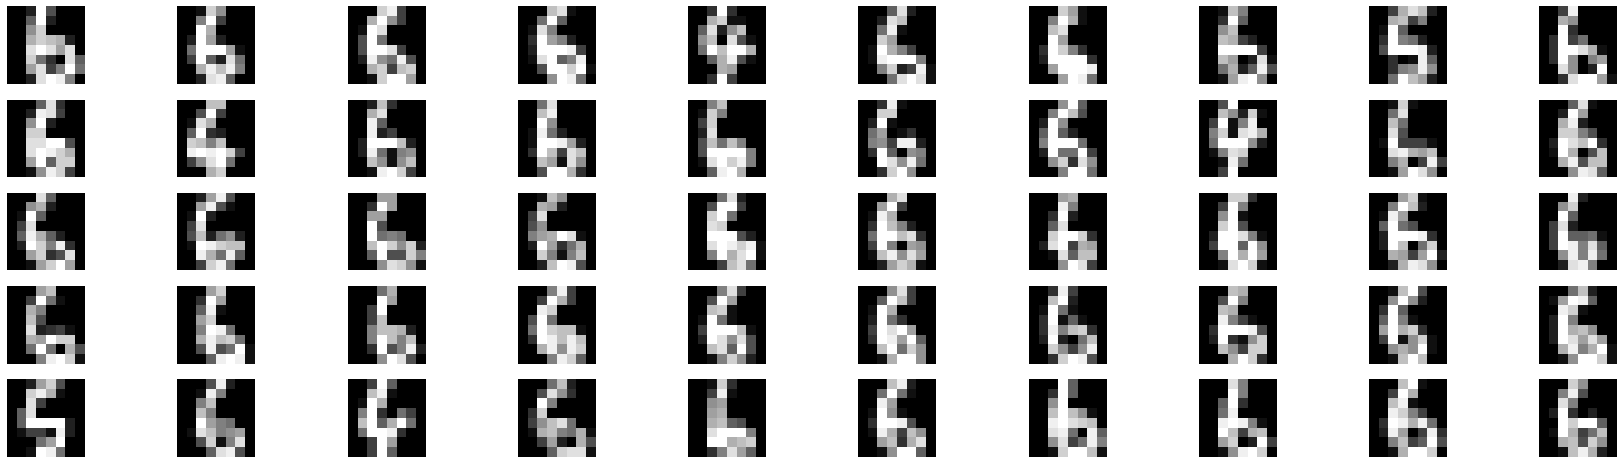

Cluster 7
316 elements


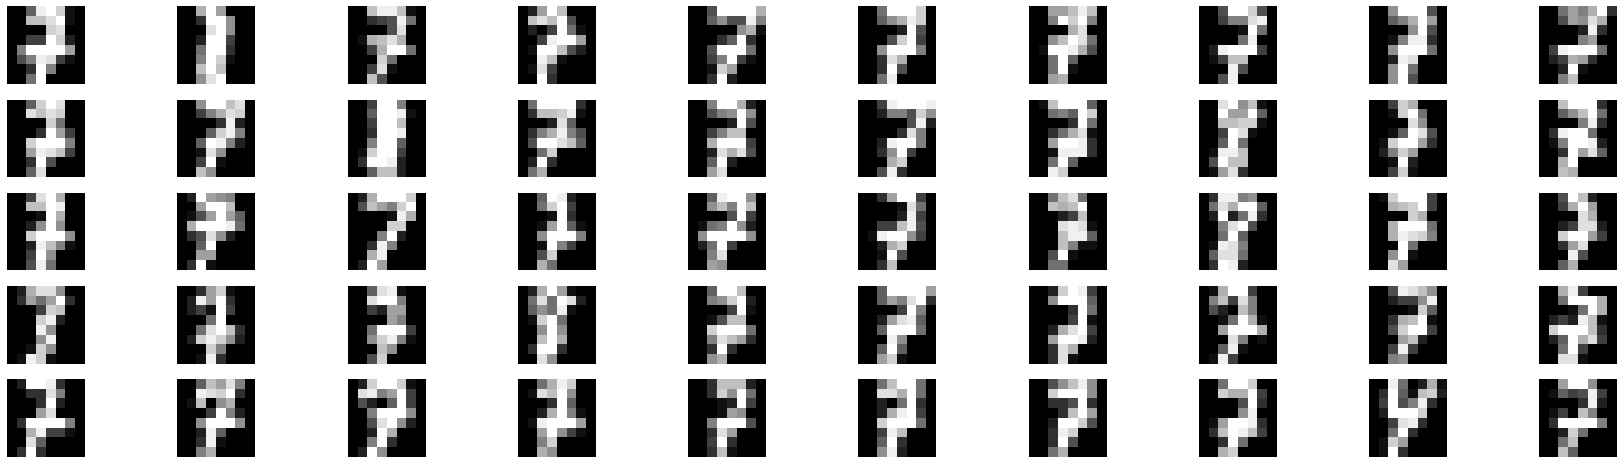

Cluster 8
300 elements


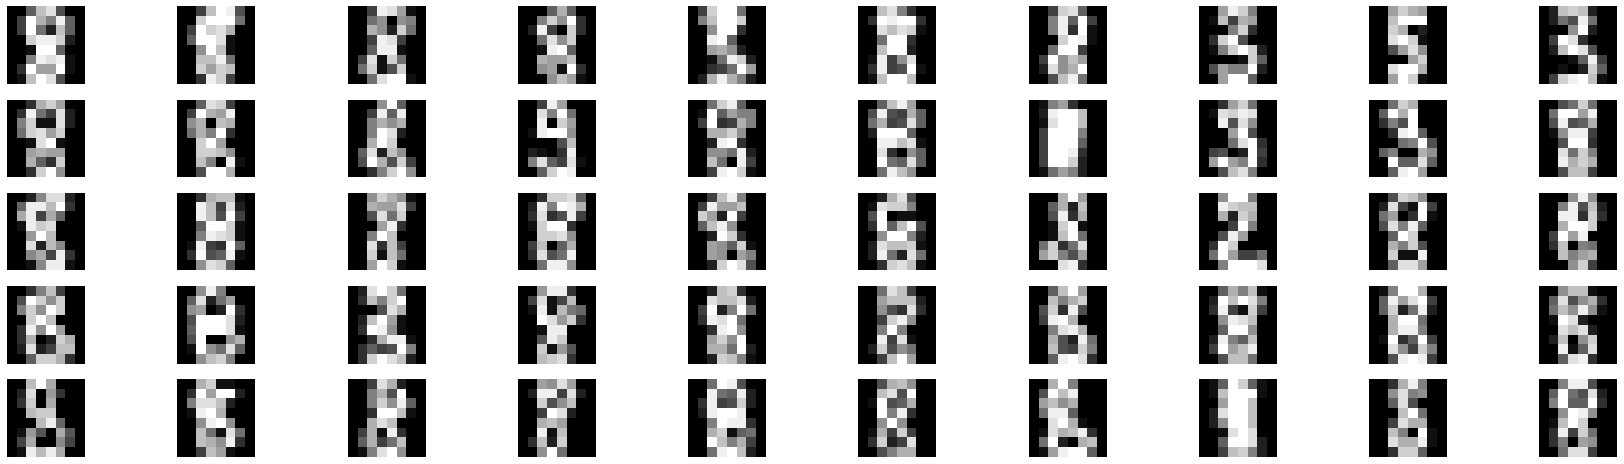

Cluster 9
520 elements


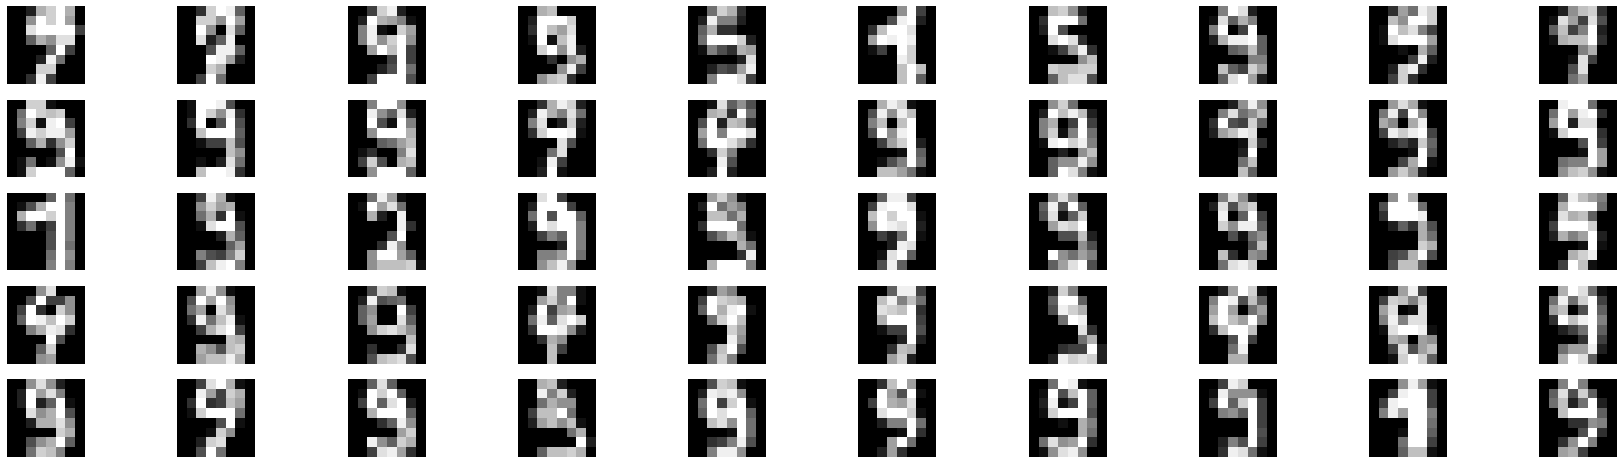

In [48]:
visualize_50_digits_in_cluster(Output)

In [49]:
print_number_in_all_cluster(Output)

cluster 0
Number of elements in a cluster: 485
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 6. 0. 0. 0. 0. 8. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 5.
 4. 0. 0. 0. 2. 0. 0. 0. 0. 0. 0. 0. 8. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 8.
 0. 6. 0. 0. 0. 0. 8. 0. 0. 6. 0. 0. 7. 0. 0. 8. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 6. 0. 0. 0. 0. 0. 0. 0. 0. 0. 6. 0. 0.
 4. 0. 0. 0. 0. 0. 8. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 2. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 8. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 5. 0.
 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 8. 0. 8.
 0. 0. 0. 0. 0. 0. 0. 0. 8. 0. 6. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 5. 6. 0. 0. 0. 0. 0. 0. 0. 8. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 8. 0. 0. 6. 5. 0. 0. 0. 0. 2.
 0. 0. 0. 0. 0. 0. 8. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 6. 0. 6. 7. 0. 0.
 0. 0. 6. 0. 0. 0. 0. 0. 0. 0. 0. 8. 0. 0. 0. 0. 0. 0. 0. 0. 8. 0. 0. 0.
 0. 

In [50]:
measuring_accuracy(Centroids,Y_data,Y_label)

Accurcy in test Dataset:
81.40569395017793
